In [2]:
import numpy as np
import pandas as pd
import requests
import os
import json

In [3]:
import tweepy

consumer_key = 'Wxm8Yf6lMgExeD1JEq7t98X1J'
consumer_secret = 'KqkbS8gRhQCVJwFoxvUa4jmXcWTIUClMIjEJ5NDKD93Erdfj9T'
access_token = '1081659370721693696-c76RET2kYjCyPiXyXndW7LLH4QmuYk'
access_secret = 'hqSE6W2DWnmiKiboFwOyoH6qxNoxNhzACDTPmnVR2xpL4'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Gathering data

In [4]:
#Download the image-predictions tsv file and write it into the file in the same folder
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open((url.split("/")[-1]), mode='wb') as file:
        file.write(r.content)

In [30]:
tweet_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [31]:
prediction=pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
fails_dict = {}
with open('tweet_json.txt', mode='w') as file:
    for tweet_id in tweet_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, Tweet_mode='extended')
            json.dump([tweet.id, tweet.retweet_count, tweet.favorite_count,tweet.text], file)
            file.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


In [32]:
tweet=pd.read_json('tweet_json.txt',orient='columns',lines=True)
tweet.columns=['tweet_id', 'retweet_count', 'favorite_count','text']

# Assessing Data 

Most of the tweet_id can obtain the data from Tweepy API as only 16 failed.

In [10]:
len(fails_dict)

16

Check the head of the `tweet` JSON file collected from Tweepy to make sure data is correctly collected as expected.

In [11]:
tweet.head()

,tweet_id,retweet_count,favorite_count,text
0,892420643555336193,8316,38023,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6143,32647,This is Tilly. She's just checking pup on you....
2,891815181378084864,4067,24570,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8459,41377,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9159,39555,This is Franklin. He would like you to stop ca...


Check the head of the `Prediction` tsv file to understand its structure.

In [12]:
prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Check the head of the `tweet_archive` file downloaded via provided link to understand its structure.

In [13]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Use `value_counts` function to check if all the rating numerators are in the range of the 10-point rating system as what the introduction said. But here we found outliners.

In [14]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Use the `info` function to check all the data types and non-null value numbers. Here we found the in_reply columns and retweet columns contain a lot of null values that need attention. All the data types seem to be fine except for the `timestamp` and later we can decide if any `int` need to be converted to `float`.

In [15]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Use `describe` function to check if all the numerical values are in reasonable ranges. Here we can see the rating_numerator and rating_denominator columns have some values a bit far from 10.  We need to identify those values and try to make denominator into a standard 10-score system for comparison. 

In [16]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Since most values of the retweet columns are null values, here we have a brief check of the non-null rows to see if contain any useful information for analysis. From what I see, I will probably drop the columns as the values are not so interesting.

In [17]:
tweet_archive[tweet_archive.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


The dog `name` column may contain some wrong names if the names are extracted using regular expression. A `value_counts` function can help to identify wrong names.

In [18]:
tweet_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
Sadie               8
the                 8
Bailey              7
an                  7
Daisy               7
Toby                7
Buddy               7
Scout               6
Rusty               6
Stanley             6
Leo                 6
Bella               6
Oscar               6
Milo                6
Jax                 6
Dave                6
Koda                6
Jack                6
Alfie               5
                 ... 
Eugene              1
Daniel              1
Kara                1
Michelangelope      1
Mimosa              1
Buddah              1
Tiger               1
Smiley              1
Noah                1
Banjo               1
Simba               1
Ron                 1
Pepper              1
Bonaparte           1
Rascal    

There are a lot of text in the `source` column but seems quite the same. Use `value_count` function to check the values in this column and we can see most of the text are useless hyperlink information that can be removed.

In [19]:
tweet_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Use `info` to check the `prediction` table. Everything seems to be fine. No null values and data types seem correct.

In [20]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Quality
##### `tweet_archive` table
- Retweet data is included in the table that should be removed
- In doggo, floofer,pupper,puppo and name columns, the none values are not regarded as NaN value
- Timestamp is string not a timedata object
- The rating numerator column has some outliers
- The rating denominator has velues not equals to 10
- Missing records in some columns (less than 2356)
- Dogs with a name of 'a'

##### `prediction` table
- In p1, p2 and p3 columns for breeds of dogs, some start with capital letters but some are not

#### Tidiness
- The source column has too much redundant infomation in `tweet_archive` table
- The favorate and retweet count columns in `tweet` table should be part of the `tweet_archive` table
- Doggo, floofer,pupper,puppo columns can be melt into one column in `tweet_archive` table

# Cleaning data

In [144]:
# Create copies of the dataset for cleaning
tweet_archive_clean=tweet_archive.copy()
prediction_clean=prediction.copy()
tweet_clean=tweet.copy()


#### Retweet data

##### Define
Remove the retweet data by query and drop functions.

##### Code

In [145]:
# drop the retweet data
retweet=tweet_archive_clean[tweet_archive_clean.retweeted_status_id.notnull()]
tweet_archive_clean.drop(index=retweet.index, axis=0, inplace=True)

##### Test

In [146]:
# Test if the retweet data still there
tweet_archive_clean[tweet_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### None values in Doggo, floofer,pupper,puppo and name columns

##### Define
Replace the none values with np.nan

##### Code

In [147]:
# Replace the none string with NaN value
cols = ['doggo', 'floofer', 'pupper', 'puppo', 'name']
tweet_archive_clean.loc[:, cols] = tweet_archive_clean.loc[:, cols].replace('None', np.nan)

##### Test

In [148]:
# Check if they are now shown as null value
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

#### Timestamp column type

##### Define
Convert the timestamp data to timedata use `to_datetime`

##### Code

In [149]:
# Convert the data type
tweet_archive_clean.timestamp=pd.to_datetime(tweet_archive_clean.timestamp)

##### Test

In [150]:
tweet_archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Outliers in rating numerator column

##### Define
Some of the rating numerator values may be extracted incorrectly. Use regular expression to do it again and store the rating in a new column named `rating`.

##### Code

In [151]:
rating = tweet_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
tweet_archive_clean['rating_numerator']=rating.loc[:,0].astype(float)
tweet_archive_clean['rating_denominator']=rating.loc[:,1].astype(float)

##### Test

In [152]:
# Now the rating numerators are in a reasonable range except for some large values
tweet_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.177140,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.705088,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


##### Define
Query the large values of numerator and we can see it is because of multiple dogs in the picture. We can either use the mean value or simply drop these rows as it will make the comparison standard unclear.

##### Code

In [153]:
tweet_archive_clean[['text','rating_numerator','rating_denominator']].query('rating_numerator>14')

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is ...,17.0,10.0
188,@dhmontgomery We also gave snoop dogg a 420/10...,420.0,10.0
189,@s8n You tried very hard to portray this good ...,666.0,10.0
290,@markhoppus 182/10,182.0,10.0
291,@bragg6of8 @Andy_Pace_ we are still looking fo...,15.0,10.0
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0,0.0
433,The floofs have been released I repeat the flo...,84.0,70.0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0
902,Why does this never happen at my front door......,165.0,150.0
979,This is Atticus. He's quite simply America af....,1776.0,10.0


In [154]:
multi_dogs=tweet_archive_clean[['text','rating_numerator','rating_denominator']].query('rating_numerator>14')
tweet_archive_clean.drop(multi_dogs.index, axis=0, inplace=True)

##### Test

In [155]:
# Now the rating numerators are in a reasonable range
tweet_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.152000e+03,7.000000e+01,7.000000e+01,0.0,0.0,2152.000000,2152.000000
mean,7.369579e+17,7.382543e+17,2.244362e+16,NaN,NaN,10.610260,10.008829
std,6.744242e+16,7.255674e+16,1.321450e+17,NaN,NaN,2.204589,0.367706
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,2.000000
25%,6.767367e+17,6.753863e+17,1.294955e+09,NaN,NaN,10.000000,10.000000
50%,7.095381e+17,6.997653e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.891706e+17,8.091840e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,14.000000,20.000000


#### Rating denominator velues not equal to 10

In [156]:
pd.set_option('display.max_colwidth', -1)
tweet_archive_clean[['text', 'rating_numerator', 'rating_denominator']].query('rating_denominator !=10')

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11.0,15.0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1598,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2.0


#### Define
Mannully correct the values based on the text and drop unknown values

##### Code

In [157]:
tweet_archive_clean.loc[1068,'rating_numerator']=13
tweet_archive_clean.loc[1068,'rating_denominator']=10
tweet_archive_clean.loc[1165,'rating_numerator']=13
tweet_archive_clean.loc[1165,'rating_denominator']=10
tweet_archive_clean.loc[1662,'rating_numerator']=10
tweet_archive_clean.loc[1662,'rating_denominator']=10
tweet_archive_clean.loc[2335,'rating_numerator']=9
tweet_archive_clean.loc[2335,'rating_denominator']=10
tweet_archive_clean.drop(index=[342,1598], axis=0, inplace=True)

##### Test

In [158]:
# Now the rating denominator all has a scale of 10
tweet_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.150000e+03,6.800000e+01,6.800000e+01,0.0,0.0,2150.000000,2150.0
mean,7.369374e+17,7.376424e+17,2.310372e+16,NaN,NaN,10.624316,10.0
std,6.743363e+16,7.245092e+16,1.340451e+17,NaN,NaN,2.186378,0.0
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,10.0
25%,6.766572e+17,6.752620e+17,1.486887e+09,NaN,NaN,10.000000,10.0
50%,7.095381e+17,6.997653e+17,4.196984e+09,NaN,NaN,11.000000,10.0
75%,7.890806e+17,8.042976e+17,4.196984e+09,NaN,NaN,12.000000,10.0
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,14.000000,10.0


####  Missing records in some columns

In [159]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2150 non-null int64
in_reply_to_status_id         68 non-null float64
in_reply_to_user_id           68 non-null float64
timestamp                     2150 non-null datetime64[ns]
source                        2150 non-null object
text                          2150 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2101 non-null object
rating_numerator              2150 non-null float64
rating_denominator            2150 non-null float64
name                          1490 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float6

##### Define
Drop the retweet columns and in_reply_to columns since they are most NaN values, which are not so useful for analysis

##### Code

In [160]:
tweet_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                    axis=1, inplace=True)

##### Test

In [161]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2150 non-null int64
timestamp             2150 non-null datetime64[ns]
source                2150 non-null object
text                  2150 non-null object
expanded_urls         2101 non-null object
rating_numerator      2150 non-null float64
rating_denominator    2150 non-null float64
name                  1490 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 218.4+ KB


#### Dogs with name of  'a'

##### Define
This is a mistake of extracting names, some of the names can be found in the text and some of them should be replaced with NaN

##### Code

In [162]:
pd.set_option('display.max_colwidth', -1)
wrong_name=tweet_archive_clean[['text','name']].query('name=="a"')
wrong_name

,text,name
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
1049,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
1193,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a
1207,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a


In [163]:
# Find possible names by extracting 'named xxx.' string, the unmatched will be NaN values
wrong_name['name']=wrong_name['text'].str.extract(r'(named \D+?[\.\s])')
wrong_name['name']=wrong_name['name'].str[6:-1] 
for index in wrong_name.index:
    tweet_archive_clean.loc[index, 'name']=wrong_name.loc[index, 'name']

##### Test

In [164]:
# No dogs have names of 'a' now
tweet_archive_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny        9 
Tucker       9 
Winston      8 
the          8 
Sadie        8 
Lola         8 
Daisy        7 
Toby         7 
Stanley      6 
an           6 
Koda         6 
Oscar        6 
Bella        6 
Bo           6 
Bailey       6 
Jax          6 
Rusty        5 
Leo          5 
Louis        5 
Scout        5 
Buddy        5 
Milo         5 
Dave         5 
Chester      5 
Bentley      5 
Jerry        4 
            .. 
Hazel        1 
space        1 
Jarod        1 
Herb         1 
Leonidas     1 
Marq         1 
Pepper       1 
Pepe         1 
Snicku       1 
Harlso       1 
Andru        1 
Dook         1 
Spark        1 
Shawwn       1 
Banjo        1 
Simba        1 
Ron          1 
Bonaparte    1 
Nugget       1 
Rascal       1 
DayZ         1 
Dug          1 
Kingsley     1 
Josep        1 
Noah         1 
Asher        1 
Acro         1 
Gòrdón       1 
Raphael      1 
Rey          1 
Name: name, Length: 968,

#### Capital letters in p1, p2 and p3 columns of `prediction` table

##### Define
Use lowercase letters throughout the columns

##### Code

In [165]:
for col in ['p1','p2','p3']:
    prediction_clean[col]=prediction_clean[col].str.lower()

##### Test

In [166]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Redundant information in source column

##### Define
Extract the last a few words using regular expression

##### Code

In [167]:
# Extract the key information from source column
tweet_archive_clean['source']=tweet_archive_clean['source'].str.extract(r'(>\D+<)', expand=True)[1:-1]
tweet_archive_clean['source']=tweet_archive_clean['source'].str[1:-1]

##### Test

In [168]:
# Check the values of source column
tweet_archive_clean.source.value_counts()

Twitter for iPhone     2016
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              10  
Name: source, dtype: int64

#### Join favorate and retweet count columns in `tweet` with `tweet_archive` table

##### Define
Use `merge` function to join these two tables on tweet_id

##### Code

In [169]:
tweet_archive_clean=pd.merge(tweet_archive_clean, tweet_clean[['tweet_id','retweet_count','favorite_count']], on='tweet_id', how='left')

##### Test

In [170]:
# Some values in retweet_count and favorate_counts are NaN due to non-existing tweets
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,8316.0,38023.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,6143.0,32647.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN,4067.0,24570.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN,8459.0,41377.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN,9159.0,39555.0


#### Doggo, floofer,pupper,puppo columns should in one column

##### Define
Make a new column `stage` to store the information and drop the other columns. Beaware of multiple stages that need some extra code to make the string correct.

##### Code

In [177]:
# Replace null values with empty string and sum them up
tweet_archive_clean.doggo.replace(np.nan, '', inplace=True)
tweet_archive_clean.floofer.replace(np.nan, '', inplace=True)
tweet_archive_clean.pupper.replace(np.nan, '', inplace=True)
tweet_archive_clean.puppo.replace(np.nan, '', inplace=True)


In [179]:
tweet_archive_clean['stage'] = tweet_archive_clean['doggo'] + tweet_archive_clean['floofer']+ tweet_archive_clean['pupper'] + tweet_archive_clean['puppo']

In [181]:
tweet_archive_clean.loc[tweet_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
tweet_archive_clean.loc[tweet_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
tweet_archive_clean.loc[tweet_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
tweet_archive_clean.loc[tweet_archive_clean.stage == '', 'stage'] = np.nan


In [183]:
tweet_archive_clean.drop(['doggo','floofer','puppo','pupper'], axis=1, inplace=True)

##### Test

In [185]:
#Check column drop and 'stage' column
pd.reset_option("^display")
tweet_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
705,760539183865880579,2016-08-02 18:14:06,Twitter for iPhone,This is Atlas. Swinging is his passion. 12/10 ...,https://twitter.com/dog_rates/status/760539183...,12.0,10.0,Atlas,3924.0,8022.0,NaN
121,865359393868664832,2017-05-19 00:12:11,Twitter for iPhone,This is Sammy. Her tongue ejects without warni...,https://twitter.com/dog_rates/status/865359393...,13.0,10.0,Sammy,5032.0,26450.0,NaN
86,873580283840344065,2017-06-10 16:39:04,Twitter for iPhone,We usually don't rate Deck-bound Saskatoon Bla...,https://twitter.com/dog_rates/status/873580283...,13.0,10.0,NaN,3892.0,23848.0,NaN
1608,676821958043033607,2015-12-15 17:51:44,Twitter for iPhone,Finally some constructive political change in ...,https://twitter.com/dog_rates/status/676821958...,11.0,10.0,NaN,16489.0,23865.0,NaN
412,812709060537683968,2016-12-24 17:18:34,Twitter for iPhone,This is Brandi and Harley. They are practicing...,https://twitter.com/dog_rates/status/812709060...,12.0,10.0,Brandi,1566.0,7072.0,NaN
766,751950017322246144,2016-07-10 01:23:49,Vine - Make a Scene,This is Lola. She's a surfing pupper. 13/10 ma...,https://vine.co/v/5WrjaYAMvMO,13.0,10.0,Lola,1001.0,3243.0,pupper
173,852912242202992640,2017-04-14 15:51:39,Twitter for iPhone,Meet Benny. He likes being adorable and making...,"https://www.gofundme.com/bennys-medical-bills,...",12.0,10.0,Benny,1915.0,9283.0,NaN
1558,678740035362037760,2015-12-21 00:53:29,Twitter for iPhone,Meet Tango. He's a large dog. Doesn't care muc...,https://twitter.com/dog_rates/status/678740035...,6.0,10.0,Tango,1805.0,3914.0,NaN
912,735635087207878657,2016-05-26 00:54:06,Twitter for iPhone,This is Dakota. He hasn't grow into his skin y...,https://twitter.com/dog_rates/status/735635087...,11.0,10.0,Dakota,2499.0,6457.0,NaN
208,845812042753855489,2017-03-26 01:38:00,Twitter for iPhone,We usually don't rate polar bears but this one...,https://twitter.com/dog_rates/status/845812042...,13.0,10.0,NaN,9261.0,30428.0,NaN


#### Merge `prediction` table and `tweet_archive` table 

##### Define
Use `merge` function to join the two tables on the tweet_id column

##### Code

In [186]:
tweet_archive_clean=pd.merge(tweet_archive_clean, prediction_clean, on='tweet_id', how='left')

##### Test

In [187]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,NaN,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8316.0,38023.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6143.0,32647.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4067.0,24570.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8459.0,41377.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9159.0,39555.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


# Data storage

In [188]:
tweet_archive_clean.to_csv('twitter_archive_master.csv',index=False)

# Data analyzing

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('twitter_archive_master.csv')

In [190]:
df.groupby('rating_numerator')['retweet_count','favorite_count'].mean()

,retweet_count,favorite_count
rating_numerator,,
0.00,1779.500000,13309.500000
1.00,1864.142857,4649.142857
2.00,1264.333333,2146.222222
3.00,894.578947,2283.526316
4.00,1040.000000,2619.733333
5.00,972.911765,2515.617647
6.00,982.875000,2595.375000
7.00,973.150943,2898.490566
8.00,849.408163,2329.428571


Text(0.5,1,'Retweet and favorite counts over the dog rating scores')

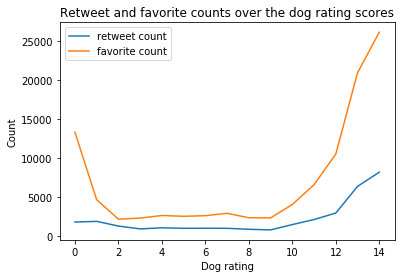

In [191]:
# Round down decimals and plot
plt.plot(df.groupby(df['rating_numerator'].apply(lambda x: round(x,0))) ['retweet_count','favorite_count'].mean())
plt.legend(['retweet count','favorite count'])
plt.xlabel("Dog rating")
plt.ylabel("Count")
plt.title("Retweet and favorite counts over the dog rating scores")

## Insight 1
For dogs with scores higher than 10, an obvious increasing trend of retweet and favorite counts is found. For dogs with rating between 10 and 14, one point rating increase will lead to 1500 more retweet and 5000 more favorite, respectively.

In [192]:
df.groupby(df['rating_numerator'].apply(lambda x: round(x,0))).tweet_id.count()/df.shape[0]

rating_numerator
0.0     0.000930
1.0     0.003256
2.0     0.004186
3.0     0.008837
4.0     0.006977
5.0     0.015814
6.0     0.014884
7.0     0.024651
8.0     0.045581
9.0     0.072558
10.0    0.206977
11.0    0.198605
12.0    0.232558
13.0    0.143721
14.0    0.020465
Name: tweet_id, dtype: float64

## Insight 2
Most ratings (78.1 %) are between 10 and 13, which is encouraging to the tweet users to post their dogs' pictures for rating. If a random user post his dog's picture, he has almost one fourth chance to get a score of 12/10 !

In [194]:
df['timestamp']=pd.to_datetime(df['timestamp'])

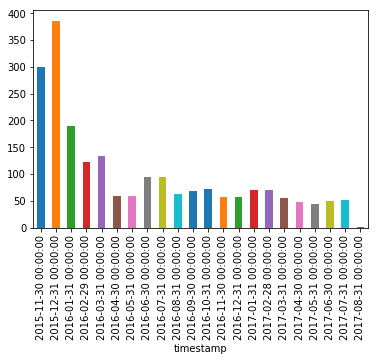

In [195]:
df.groupby(pd.Grouper(key='timestamp',freq="M"))['tweet_id'].count().plot(kind='bar')

## Insight 3
The active period of this @dog_rates account is between Nov.2015 - Mar.2016, which reaches its maximal rating count of around 400 at Dec 2015. In 2017, average rating count is around 60 per month.

# Data visualization

In [196]:
popular_dog=df['p1'].value_counts().head(10).index

In [197]:
pupular_dog_count=df['p1'].value_counts().head(10).values

In [198]:
ratings=[]
for dog in popular_dog:
    score=df[df['p1']==dog].rating_numerator.mean()
    ratings.append(score)

(9.8, 12.2)

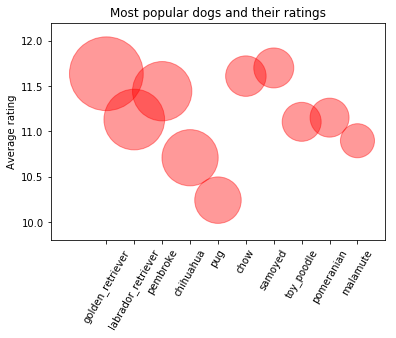

In [199]:
plt.scatter(popular_dog, ratings, s = pupular_dog_count*40, alpha=0.4, edgecolors = "red", c = "red", zorder = 2)
plt.xticks([0,1,2,3,4,5,6,7,8,9], popular_dog, rotation=60)
plt.title('Most popular dogs and their ratings')
plt.ylabel('Average rating')
plt.xlim((-2, 10))
plt.ylim((9.8,12.2))

#### Based on the prediction, the top 10 most popular dog breeds and their average rating are selected.  The size of the circles represents the count of these dogs.